# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:

**RA**: 


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

In [337]:
# mostrar todas as colunas
pd.set_option("display.max_columns", None)

In [338]:
train_data = pd.read_csv("./data/train.csv")
data = pd.read_csv("./data/RHP_data.csv")

train_data = data.merge(train_data, on="Id", how="right")


#### Após carregas os dados, iremos fazer uma breve análise do que cada uma das colunas representa.

* Peso: representa o peso, em Kg, de cada indivíduo.

* Altura: representa a altura, em cm, de cada indivíduo.

* IMC: representa o índice de massa corporal do paciente, índice que representa se o paciente estáem seu peso ideal ou não. É calculado pelo peso (em metros) dividido pela altura elevada ao quadrado.

* Atendimento: indica a data em que foi feito o atendimento do paciente.

* DN: data em que a declaração de nascido vivo do paciente foi escrita.

* Idade: representa a idade do paciente, sendo os anos representados por um valor real.

* Convênio: Indica qual o convênio do cliente.

* Pulsos: Indica a qualidade da circulação arterial. Pulsos fracos ou ausentes podem sugerir problemas como obstrução arterial ou insuficiência cardíaca.

* PA Sistolica: valor mais alto (medido em mmHg) que aparece durante uma aferição de pressão. Representa a pressão exercida nas artérias durante a contração do coração (sístole). Valores elevados indicam hipertensão arterial, enquanto valores muito baixos podem sugerir hipotensão.

* PA Diastolica: valor mais baixo (medido em mmHg) que aparece durante uma aferição de pressão. Reflete a pressão arterial durante o relaxamento do coração (diástole). É usada junto com a PA sistólica para diagnosticar hipertensão.

* PPA (Pressão de Pulso Arterial): Diferença entre a pressão arterial sistólica e diastólica. Indica a rigidez arterial. Valores elevados podem estar associados a doenças cardiovasculares.

* B2: Segundo Ruído Cardíaco, representa o som do fechamento das válvulas aórtica e pulmonar. 

* Sopro: Presença de ruídos anormais detectados durante a ausculta cardíaca. 

* FC (Frequência Cardíaca): número de batimentos cardíacos por minuto (bpm). Frequências muito altas (taquicardia) ou baixas (bradicardia) podem indicar problemas cardíacos.

* HDA1 (Histórico de doenças atual 1): informações detalhadas sobre o principal problema clínico atual.

* HDA2 (Histórico de doenças atual 2): informações adicionais sobre o problema clínico ou outras condições associadas.

* Sexo: genêro biológico do paciente.

* Motivo 1: principal razão para a consulta.

* Motivo 2: razão secundária para a consulta.

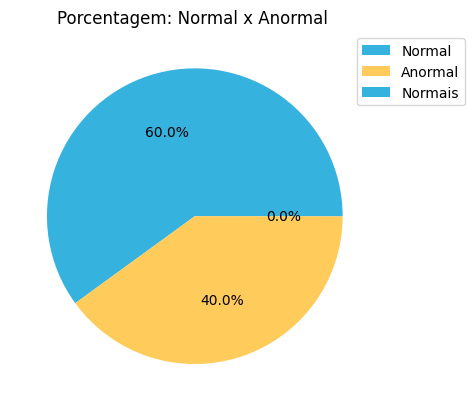

In [339]:

colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [340]:
print(f"Quantidade de amostras Normais: {sum(train_data['CLASSE'] == 'Normal')}")
print(f"Quantidade de amostras Anormais: {sum(train_data['CLASSE'] == 'Anormal')}")

Quantidade de amostras Normais: 8137
Quantidade de amostras Anormais: 5421


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

In [341]:
substituir(train_data, "CLASSE", "Normais", "Normal")

In [342]:
normal_data = train_data[train_data["CLASSE"] == "Normal"]

In [343]:
normal_data["nan_count"] = normal_data.isna().sum(axis=1)
normal_data = normal_data.sort_values(by="nan_count", ascending=False)

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_9520\3752332633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data["nan_count"] = normal_data.isna().sum(axis=1)


In [344]:
normal_data_reduced = normal_data.iloc[0:2716,:]

In [345]:
train_data = train_data[~train_data["Id"].isin(normal_data_reduced["Id"])]

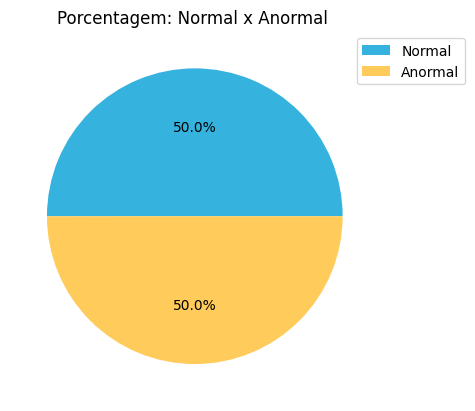

In [346]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [347]:
train_data = train_data.drop(columns=["Atendimento", "DN", "Convenio"])

In [348]:
converter_numeric(train_data, "FC")
converter_numeric(train_data, "IDADE")

In [349]:
peso_invalido = train_data[train_data["Peso"] < 0] 
print(len(peso_invalido))

train_data = train_data.drop(peso_invalido.index)

0


In [350]:
train_data[train_data["Altura"] < 40] = np.nan

In [351]:
idade_invalida = train_data[(train_data["IDADE"] <= 0) | (train_data["IDADE"] > 19)]
print(len(idade_invalida))
train_data = train_data.drop(idade_invalida.index)

233


In [352]:
pa_sistolica_invalida = train_data[
    (train_data["PA SISTOLICA"] > 500) | (train_data["PA SISTOLICA"] < 40)
]
print(len(pa_sistolica_invalida))
train_data = train_data.drop(pa_sistolica_invalida.index)

1


In [353]:
pa_diastolica_irreal = train_data[train_data["PA DIASTOLICA"] < 30]
print(len(pa_diastolica_irreal))
train_data = train_data.drop(pa_diastolica_irreal.index)

3


In [354]:
fc_irreal = train_data[(train_data["FC"] > 220) | (train_data["FC"] < 60)]

train_data = train_data.drop(fc_irreal.index)

In [355]:

# Primeiro usa a função para retornar todas as amostras que são outliners
outliners_peso = identifica_outliners(train_data, ['Peso'])
outliners_altura = identifica_outliners(train_data, ['Altura'])
outliners_idade = identifica_outliners(train_data, ['IDADE'])

In [356]:
outliners_peso = pd.Series(outliners_peso, index=train_data.index)
outliners_altura = pd.Series(outliners_altura, index=train_data.index)
outliners_idade = pd.Series(outliners_idade, index=train_data.index)

# Substituir os valores por NaN onde a máscara booleana é True
train_data.loc[outliners_peso == True, "Peso"] = np.nan
train_data.loc[outliners_altura == True, "Altura"] = np.nan
train_data.loc[outliners_idade == True, "IDADE"] = np.nan

In [357]:
train_data["PA DIASTOLICA"] = fill_na_mediana(train_data, "PA DIASTOLICA")
train_data["PA SISTOLICA"] = fill_na_mediana(train_data, "PA SISTOLICA")
train_data["FC"] = fill_na_mediana(train_data, "FC")

In [358]:
train_data["Peso"] = fill_na_mediana(train_data, "Peso")
train_data["Altura"] = fill_na_mediana(train_data, "Altura")
train_data["IDADE"] = fill_na_mediana(train_data, "IDADE")

In [359]:
altura_aux = train_data["Altura"] / 100


train_data["IMC"] = train_data["Peso"] / np.power(altura_aux, 2)

In [361]:
substituir(train_data, "PULSOS", "NORMAIS", "Normais")
substituir(train_data, "PULSOS", "AMPLOS", "Amplos")

In [362]:
substituir(train_data, "SOPRO", "sistólico", "Sistólico")
substituir(train_data, "SOPRO", "contínuo", "Contínuo")

In [363]:
substituir(train_data, "SEXO", "Masculino", "M")
substituir(train_data, "SEXO", "masculino", "M")

substituir(train_data, "SEXO", "Feminino", "F")

In [364]:
train_data = train_data.dropna(subset=["PULSOS"])

In [365]:
train_data = train_data.dropna(subset=["B2"])

In [366]:
train_data = train_data.dropna(subset=["HDA 1"])

In [367]:
train_data["HDA2"] = train_data["HDA2"].fillna("Assintomático")

In [368]:
train_data = train_data.dropna(subset=["SEXO"])

In [369]:
train_data = train_data.dropna(subset=["MOTIVO1"])

In [370]:
train_data["MOTIVO2"] = train_data["MOTIVO2"].fillna(train_data['MOTIVO2'].mode()[0])

In [371]:
train_data["PPA"] = train_data["PPA"].replace("#VALUE!", np.nan)

In [372]:
train_data = train_data.dropna(subset=["PPA"])

In [373]:
train_data = train_data.dropna(subset=["CLASSE"])

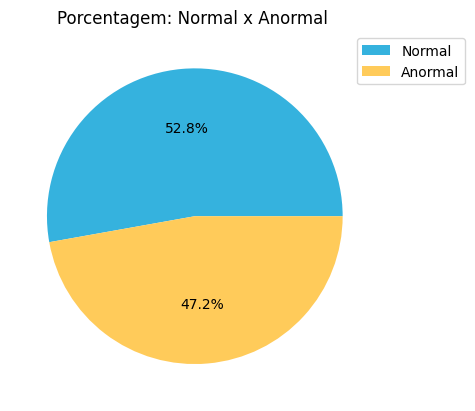

In [374]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

#### Dados teste

In [375]:
test_data = pd.read_csv("./data/test.csv")
data2 = pd.read_csv("./data/RHP_data.csv")

test_data = data2.merge(test_data, on="Id", how="right")


In [376]:
converter_numeric(test_data, "FC")
converter_numeric(test_data, "IDADE")

In [377]:
test_data["PA DIASTOLICA"] = fill_na_mediana(test_data, "PA DIASTOLICA")
test_data["PA SISTOLICA"] = fill_na_mediana(test_data, "PA SISTOLICA")
test_data["FC"] = fill_na_mediana(test_data, "FC")

In [378]:
test_data["Peso"] = fill_na_mediana(test_data, "Peso")
test_data["Altura"] = fill_na_mediana(test_data, "Altura")
test_data["IDADE"] = fill_na_mediana(test_data, "IDADE")

In [379]:
test_data["Peso"] = test_data["Peso"].replace(0, test_data["Peso"].median())

In [380]:
test_data["Altura"] = test_data["Altura"].replace(0, test_data["Altura"].median())

In [381]:
altura_invalida = test_data[test_data["Altura"] < 50]

test_data.loc[altura_invalida.index, "Altura"] = test_data["Altura"].median()

In [382]:
altura_aux = test_data["Altura"] / 100


test_data["IMC"] = test_data["Peso"] / np.power(altura_aux, 2)

In [383]:
test_data = test_data.drop(columns=["Atendimento", "DN", "Convenio"])

In [384]:
substituir(test_data, "PULSOS", "NORMAIS", "Normais")
substituir(test_data, "PULSOS", "AMPLOS", "Amplos")

In [385]:
substituir(test_data, "SOPRO", "sistólico", "Sistólico")
substituir(test_data, "SOPRO", "contínuo", "Contínuo")

In [386]:
substituir(test_data, "SEXO", "Masculino", "M")
substituir(test_data, "SEXO", "masculino", "M")

substituir(test_data, "SEXO", "Feminino", "F")

In [387]:
test_data["PULSOS"] = test_data["PULSOS"].fillna(test_data["PULSOS"].mode()[0])

In [388]:
test_data["B2"] = test_data["B2"].fillna(test_data["B2"].mode()[0])

In [389]:
test_data["SOPRO"] = test_data["SOPRO"].fillna(test_data["SOPRO"].mode()[0])

In [390]:
test_data["SEXO"] = test_data["SEXO"].fillna(test_data["SEXO"].mode()[0])

In [391]:
test_data["MOTIVO1"] = test_data["MOTIVO1"].fillna(test_data["MOTIVO1"].mode()[0])
test_data["MOTIVO2"] = test_data["MOTIVO2"].fillna(test_data["MOTIVO2"].mode()[0])

In [392]:
test_data["PPA"] = test_data["PPA"].replace("#VALUE!", np.nan)
test_data["PPA"] = test_data["PPA"].fillna(test_data["PPA"].mode()[0])

In [393]:
test_data["HDA 1"] = test_data["HDA 1"].fillna("Assintomático")
test_data["HDA2"] = test_data["HDA2"].fillna("Assintomático")

#### Encoder

In [394]:
from sklearn.preprocessing import LabelEncoder

In [395]:
colunas = [
    "PULSOS",
    "PPA",
    "B2",
    "SOPRO",
    "HDA 1",
    "HDA2",
    "SEXO",
    "MOTIVO1",
    "MOTIVO2",
    "CLASSE",
]

In [396]:
encoders_train = {}
for col in colunas:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    encoders_train[col] = le  # Armazenar o LabelEncoder para cada coluna

In [397]:
for col, encoder in encoders_train.items():
    print(f"Coluna: {col}")
    # O mapeamento entre as categorias e os números atribuídos
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(mapping)
    print("-" * 30)

Coluna: PULSOS
{'Amplos': np.int64(0), 'Diminuídos ': np.int64(1), 'Femorais diminuidos': np.int64(2), 'Normais': np.int64(3), 'Outro': np.int64(4)}
------------------------------
Coluna: PPA
{'HAS-1 PAD': np.int64(0), 'HAS-1 PAS': np.int64(1), 'HAS-2 PAD': np.int64(2), 'HAS-2 PAS': np.int64(3), 'Normal': np.int64(4), 'Não Calculado': np.int64(5), 'Pre-Hipertensão PAD': np.int64(6), 'Pre-Hipertensão PAS': np.int64(7)}
------------------------------
Coluna: B2
{'Desdob fixo': np.int64(0), 'Hiperfonética': np.int64(1), 'Normal': np.int64(2), 'Outro': np.int64(3), 'Única': np.int64(4)}
------------------------------
Coluna: SOPRO
{'Contínuo': np.int64(0), 'Sistólico': np.int64(1), 'ausente': np.int64(2), 'diastólico': np.int64(3)}
------------------------------
Coluna: HDA 1
{'Assintomático': np.int64(0), 'Cianose': np.int64(1), 'Desmaio/tontura': np.int64(2), 'Dispneia': np.int64(3), 'Dor precordial': np.int64(4), 'Ganho de peso': np.int64(5), 'Outro': np.int64(6), 'Palpitacao': np.int64

In [398]:
encoders_test = {}
for col in colunas[:-1]:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])
    encoders_test[col] = le

#### Normalização

In [399]:
from sklearn.preprocessing import StandardScaler

In [400]:
dados = pd.concat([train_data, test_data], axis=0)

ids = dados["Id"].to_numpy()
classes = dados["CLASSE"].to_numpy()

In [401]:
dados = dados.drop(columns=["Id", "CLASSE"])

In [402]:
scaler = StandardScaler()
dados_normalizados = pd.DataFrame(scaler.fit_transform(dados), columns=dados.columns)

#### K means

In [403]:
from sklearn.cluster import KMeans

In [404]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(dados_normalizados)

KMeans(n_clusters=2, random_state=42)

In [405]:
rotulos = kmeans.labels_
centroides = kmeans.cluster_centers_

In [406]:
dados_normalizados["CLUSTER"] = rotulos

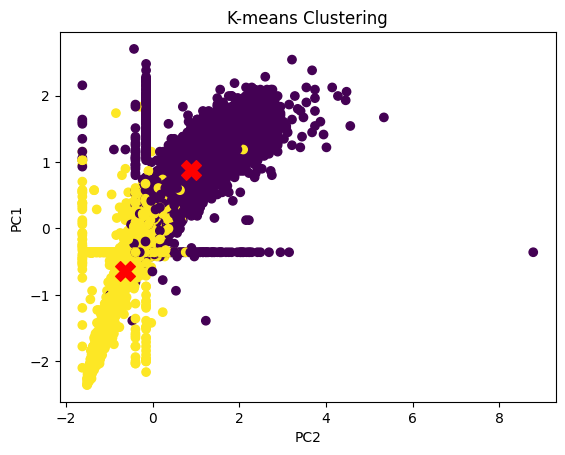

In [407]:
plt.scatter(
    dados_normalizados["Peso"],
    dados_normalizados["Altura"],
    c=dados_normalizados["CLUSTER"],
    cmap="viridis",
)
plt.scatter(centroides[:, 0], centroides[:, 1], s=200, c="red", marker="X")
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.title("K-means Clustering")
plt.show()

In [408]:
dados_normalizados["Id"] = ids
dados_normalizados["CLASSE"] = classes

#### Separação para treinamento

In [409]:
X = train_data.iloc[:, 1:-1]

y = train_data.iloc[:, -1]

X_test = test_data.iloc[:, 1:]

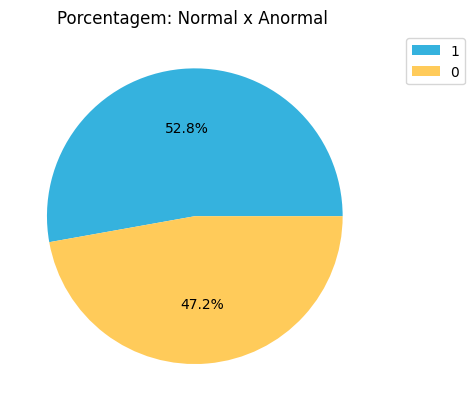

In [410]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [411]:
X_train = pd.DataFrame(train_data["Id"])

X_train = dados_normalizados[dados_normalizados["Id"].isin(X_train["Id"])]

In [412]:
X_test = pd.DataFrame(test_data["Id"])

X_test = dados_normalizados[dados_normalizados["Id"].isin(X_test["Id"])]

In [413]:
y = X_train["CLASSE"]
X = X_train.drop(columns=["Id", "CLASSE"])
X_t = X_test.drop(columns=["Id", "CLASSE"])

In [414]:
X

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLUSTER
0,0.235514,0.318649,0.179595,-0.156339,0.052383,0.873579,2.654155,-5.165758,0.098695,0.806385,0.444134,3.137617,-0.199359,0.854885,0.923843,1.202721,0
1,-0.758014,-0.840929,-0.054400,-0.943231,0.052383,-0.045590,-0.182070,0.685518,0.098695,-1.211030,0.444134,-0.488067,-0.199359,0.854885,0.923843,1.410968,1
2,1.361512,1.542649,-0.021884,0.241504,0.052383,1.792747,1.236042,-3.995503,0.098695,0.806385,-0.670860,-0.488067,-0.199359,0.854885,-0.195499,-0.671501,0
3,-0.029427,-0.035666,0.289402,-0.270636,0.052383,-0.045590,-0.182070,-0.484737,0.098695,0.806385,0.444134,2.619663,-0.199359,0.854885,0.923843,0.994474,1
4,-0.493073,-0.422192,-0.085195,-0.672874,0.052383,-0.045590,-0.182070,0.685518,0.098695,0.806385,-0.001864,-0.488067,-0.199359,0.854885,-0.195499,-0.671501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,1.030336,0.544123,1.086140,0.336019,0.052383,-0.964758,-0.182070,-0.484737,0.098695,-1.211030,-0.001864,1.583753,-0.199359,0.854885,0.923843,0.786227,0
6572,-0.294368,-0.261140,0.115148,-0.595944,0.052383,-0.045590,-0.182070,0.685518,0.098695,-1.211030,-0.113363,-0.488067,-0.199359,0.854885,-0.195499,-0.671501,1
6573,0.036808,0.415281,-0.305275,0.505267,0.052383,-0.045590,-0.182070,-0.484737,0.098695,0.806385,-0.893858,-0.488067,-0.199359,-1.193216,-0.195499,-0.671501,0
6574,0.367984,-0.003456,1.055536,-0.336577,0.052383,0.413995,1.236042,1.855773,0.098695,-1.211030,-0.001864,1.065798,6.833906,-1.193216,0.923843,0.577981,0


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [415]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [416]:
from sklearn.ensemble import RandomForestClassifier

In [417]:
model = RandomForestClassifier(n_estimators=300, random_state=42)

In [418]:
scores = cross_val_score(model, X, y, cv=10)

In [419]:
print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 93.64%
Desvio padrão da acurácia: 0.87%


In [420]:
for i in scores:
    print(f"{(i * 100):.2f}%")

93.77%
92.55%
92.71%
93.47%
93.47%
95.29%
94.52%
94.67%
93.00%
93.00%


(Sem normalização e K-means)<br>
Pontuação média de acurácia: 93.79%<br>
Desvio padrão da acurácia: 0.82%

Apenas com normalização <br>
Pontuação média de acurácia: 93.73% <br>
Desvio padrão da acurácia: 0.82%

Melhor até agora ! menos 92%s <br>
normalização + 2 clusters <br>
Pontuação média de acurácia: 93.74% <br>
Desvio padrão da acurácia: 0.85%

In [421]:
modelo_rf = RandomForestClassifier(n_estimators=300, random_state=42)

In [422]:
modelo_rf.fit(X,y)

RandomForestClassifier(n_estimators=300, random_state=42)

In [423]:
predicao_random_forest = modelo_rf.predict_proba(X_t)

In [424]:
resultado_pred_random_forest = pd.DataFrame(test_data["Id"], columns=["Id"])
resultado_pred_random_forest["Predicted"] = predicao_random_forest[:, 0]

display(resultado_pred_random_forest)

,Id,Predicted
0,8957,0.373333
1,4246,0.026667
2,9089,0.156667
3,10606,0.240000
4,9863,0.080000
...,...,...
3141,14053,0.196667
3142,9000,0.920000
3143,14643,0.970000
3144,15107,0.990000


In [425]:
resultado_pred_random_forest.to_csv(
    "./resultados/previsao_random_forest_nova_tentativa.csv", index=False
)

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [428]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [429]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [430]:
y_pred = random_forest.predict(X_test)

In [431]:
dados_errados = X_test[y_pred != y_test]

In [432]:
clusters = dados_errados.drop(columns=["CLUSTER"])
dados_errados = dados_errados.drop(columns=["CLUSTER"])

In [433]:
dados_errados = dados_errados * scaler.scale_ + scaler.mean_

In [434]:
dados_errados["CLASSE"] = (y_test[y_pred != y_test]).astype(int)

In [435]:

dados_errados["CLASSE PREV"] = 1 - dados_errados["CLASSE"]

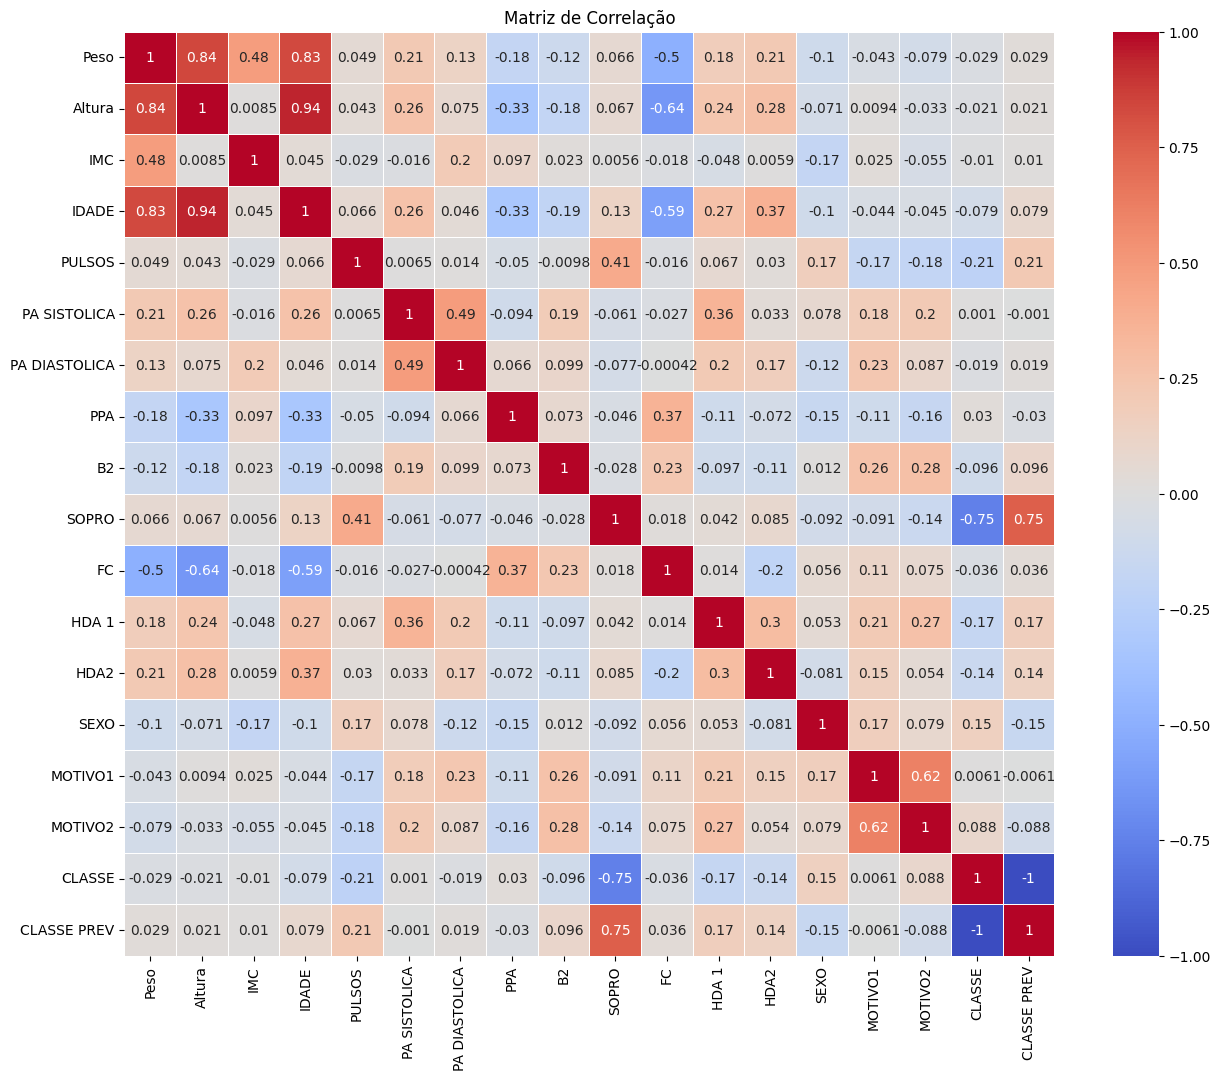

In [436]:
plotar_correlacao(dados_errados)

In [437]:
for col, encoder in encoders_train.items():
    print(f"Coluna: {col}")
    # O mapeamento entre as categorias e os números atribuídos
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(mapping)
    print("-" * 30)

Coluna: PULSOS
{'Amplos': np.int64(0), 'Diminuídos ': np.int64(1), 'Femorais diminuidos': np.int64(2), 'Normais': np.int64(3), 'Outro': np.int64(4)}
------------------------------
Coluna: PPA
{'HAS-1 PAD': np.int64(0), 'HAS-1 PAS': np.int64(1), 'HAS-2 PAD': np.int64(2), 'HAS-2 PAS': np.int64(3), 'Normal': np.int64(4), 'Não Calculado': np.int64(5), 'Pre-Hipertensão PAD': np.int64(6), 'Pre-Hipertensão PAS': np.int64(7)}
------------------------------
Coluna: B2
{'Desdob fixo': np.int64(0), 'Hiperfonética': np.int64(1), 'Normal': np.int64(2), 'Outro': np.int64(3), 'Única': np.int64(4)}
------------------------------
Coluna: SOPRO
{'Contínuo': np.int64(0), 'Sistólico': np.int64(1), 'ausente': np.int64(2), 'diastólico': np.int64(3)}
------------------------------
Coluna: HDA 1
{'Assintomático': np.int64(0), 'Cianose': np.int64(1), 'Desmaio/tontura': np.int64(2), 'Dispneia': np.int64(3), 'Dor precordial': np.int64(4), 'Ganho de peso': np.int64(5), 'Outro': np.int64(6), 'Palpitacao': np.int64

In [438]:
plot_hist(dados_errados, "PA ")

KeyError: 'PA '

<Figure size 800x600 with 0 Axes>

In [208]:
colunas = dados_errados.columns


for col in encoders_train:
    dados_errados[col] = encoders_train[col].inverse_transform(
        dados_errados[col].astype(int)
    )

In [209]:
dados_errados["CLASSE PREV"] = dados_errados["CLASSE PREV"].replace(
    {0: "Anormal", 1: "Normal"}
)

In [210]:
dados_errados.head(5)

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE,CLASSE PREV
828,14.0,105.0,12.698413,4.06,Normais,100.0,50.0,Normal,Normal,ausente,120.0,Palpitacao,Assintomático,M,1 - Cardiopatia já estabelecida,6 - Palpitação/taquicardia/arritmia,Anormal,Normal
730,25.0,133.0,14.133077,1.95,Normais,90.0,55.0,Não Calculado,Normal,ausente,90.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Atividade física,Anormal,Normal
472,27.0,130.0,15.976331,10.01,Normais,100.0,70.0,Normal,Normal,ausente,90.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Atividade física,Anormal,Normal
2018,10.6,83.0,15.386849,2.27,Normais,100.0,60.0,Não Calculado,Normal,ausente,100.0,Palpitacao,Assintomático,F,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Anormal,Normal
4147,6.7,62.0,17.429761,0.41,Normais,100.0,60.0,Não Calculado,Normal,ausente,120.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia,Normal,Anormal


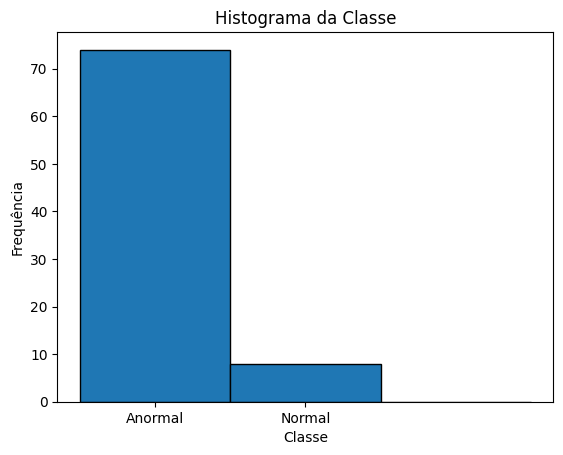

In [211]:
plt.hist(
    dados_errados["CLASSE"], bins=[-0.5, 0.5, 1.5, 2.5], edgecolor="black"
)  # Dividindo em 3 bins
plt.title("Histograma da Classe")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks([0, 1])  # Apenas 0 e 1 no eixo x
plt.show()

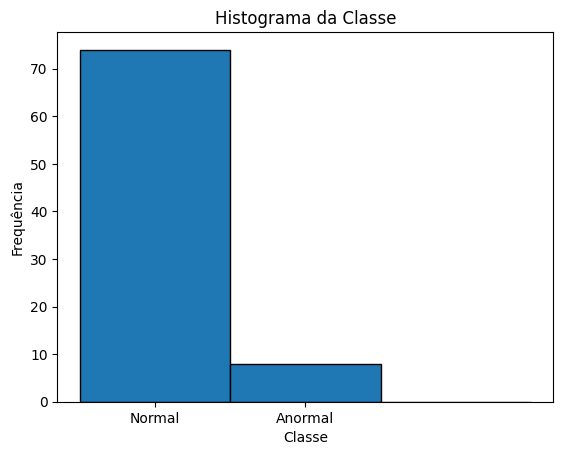

In [212]:
plt.hist(
    dados_errados["CLASSE PREV"], bins=[-0.5, 0.5, 1.5, 2.5], edgecolor="black"
)  # Dividindo em 3 bins
plt.title("Histograma da Classe")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks([0, 1])  # Apenas 0 e 1 no eixo x
plt.show()

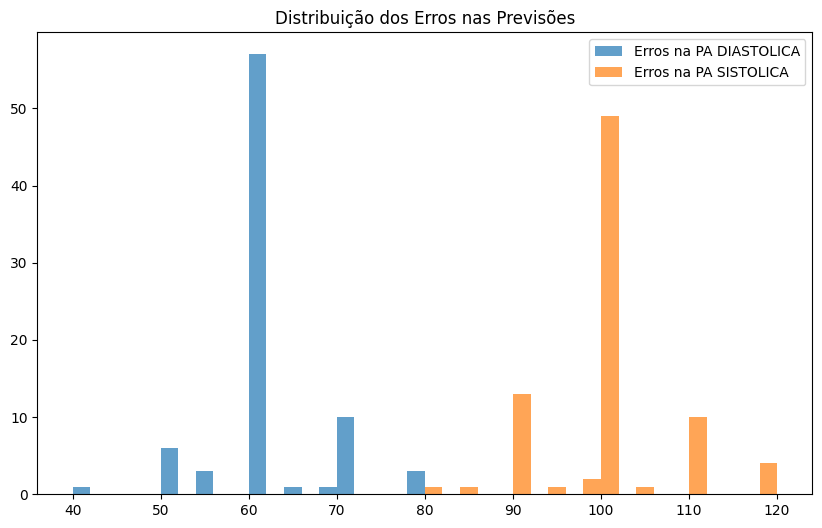

In [213]:
import matplotlib.pyplot as plt

# Filtrando os dados errados
erros = dados_errados[dados_errados["CLASSE PREV"] != dados_errados["CLASSE"]]

# Plotando a distribuição dos erros em um gráfico
plt.figure(figsize=(10, 6))
plt.hist(erros["PA DIASTOLICA"], bins=20, alpha=0.7, label="Erros na PA DIASTOLICA")
plt.hist(erros["PA SISTOLICA"], bins=20, alpha=0.7, label="Erros na PA SISTOLICA")
plt.legend()
plt.title("Distribuição dos Erros nas Previsões")
plt.show()